# Projeto Marinha do Brasil

## Laboratório de Processamento de Sinais - UFRJ

### Autor: Vinícius dos Santos Mello <viniciusdsmello@poli.ufrj.br>

#### Notebook destinado a análise de Treinamento de Variational Autoencoders (VAE)

In [1]:
export CUDA_DEVICE_ORDER=PCI_BUS_ID
export CUDA_VISIBLE_DEVICES=0,1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0,1


In [2]:
import os
import sys
import time
import multiprocessing
import pprint
import logging

import numpy as np
from datetime import datetime, timedelta
import tensorflow as tf
from Packages.NoveltyDetection.setup.noveltyDetectionConfig import CONFIG
from Packages.NoveltyDetection.VariationalAutoencoders.VAENoveltyDetectionAnalysis import VAENoveltyDetectionAnalysis

from Functions.telegrambot import Bot

logging.getLogger('matplotlib').setLevel(logging.WARNING)

tf.get_logger().setLevel(logging.ERROR)

tf.debugging.set_log_device_placement(False)

gpus = tf.config.experimental.list_physical_devices('GPU')

print("Num GPUs Available: ", len(gpus))

if gpus:
    tf.config.experimental.set_visible_devices(gpus[1], f'GPU')

Num GPUs Available:  2


In [3]:
num_processes = multiprocessing.cpu_count()

my_bot = Bot("lisa_thebot")

# Enviroment variables
data_path = CONFIG['OUTPUTDATAPATH']
results_path = CONFIG['PACKAGE_NAME']

training_params = {
    "Technique": "VariationalAutoencoder",
    "TechniqueParameters": {
        "IntermediateDimension": [256],
        "LatentDimension": 64
    },
    "DevelopmentMode": False,
    "DevelopmentEvents": 1600,
    "NoveltyDetection": True,
    "InputDataConfig": {
        "database": "4classes",
        "n_pts_fft": 1024,
        "decimation_rate": 3,
        "spectrum_bins_left": 400,
        "n_windows": 1,
        "balance_data": True
    },
    "OptmizerAlgorithm": {
        "name": "Adam",
        "parameters": {
            "learning_rate": 0.001,
            "beta_1": 0.90,
            "beta_2": 0.999,
            "epsilon": 1e-08,
            "learning_decay": 1e-6,
            "momentum": 0.3,
            "nesterov": True
        }
    },
    "HyperParameters": {
        "n_folds": 4,
        "pretraining_n_epochs": 500,
        "finetuning_n_epochs": 300,
        "n_inits": 2,
        "batch_size": 64,
        # TODO: Start using this config on VAE model
        "kernel_initializer": "uniform",
        "bias_initializer": "ones",
        "encoder_activation_function": "relu",
        "decoder_activation_function": "relu",
        "norm": "mapstd",
        "metrics": ["accuracy"],
        "loss": "mean_squared_error",
        "classifier_loss": "mean_squared_error"
    },
    "callbacks": {
        "EarlyStopping": {
            "patience": 50,
            "monitor": "val_total_loss"
        }
    }
}

analysis = VAENoveltyDetectionAnalysis(parameters=training_params,
                                       load_hash=False, load_data=True, verbose=True)
all_data, all_trgt, trgt_sparse = analysis.getData()

analysis.emulate_novelties()
analysis.build_vae_models()

trn_data = analysis.trn_data
trn_trgt = analysis.trn_trgt
trn_trgt_sparse = analysis.trn_trgt_sparse

/home/vinicius.mello/.virtualenvs/deepsonar/local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[+] Time to read data file: 3.898085355758667 seconds
Qtd event of A is 12939
Qtd event of B is 29352
Qtd event of C is 11510
Qtd event of D is 23760

Biggest class is B with 29352 events
Total of events in the dataset is 77561
Balancing data...
DataHandler Class: CreateEventsForClass
Original Size: (12939, 400)
DataHandler Class: CreateEventsForClass
Original Size: (29352, 400)
DataHandler Class: CreateEventsForClass
Original Size: (11510, 400)
DataHandler Class: CreateEventsForClass
Original Size: (23760, 400)
Reading from /home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/4_folds_cross_validation_balanced_data.jbl


INFO:root:Emulating novelty classes...
DEBUG:root:Spliting data for novelty class #A...


Reading from /home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/4_folds_cross_validation_balanced_data.jbl


DEBUG:root:Spliting data for novelty class #B...
DEBUG:root:Spliting data for novelty class #C...
DEBUG:root:Spliting data for novelty class #D...
DEBUG:root:Building VAE model for novelty class #A...
DEBUG:root:Loading model weights from /home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/VariationalAutoencoder/outputs/4f54e5a523b80f449809462db3e5c264e2e6c60400d900c42d910796ccbe024b/Models/vae_0_inovelty_0_ifold_fold_0
DEBUG:root:Loading model weights from /home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/VariationalAutoencoder/outputs/4f54e5a523b80f449809462db3e5c264e2e6c60400d900c42d910796ccbe024b/Models/vae_0_inovelty_1_ifold_fold_1
DEBUG:root:Loading model weights from /home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/VariationalAutoencoder/outputs/4f54e5a523b80f449809462db3e5c264e2e6c60400d900c42d910796ccbe024b/Models/vae_0_inovelty_2_ifold_fold_2
DEBUG:root:Loading model weights from /home/vinicius.mello/Works

In [8]:
pp = pprint.PrettyPrinter(indent=1)
print(analysis.model_hash)
print(analysis.getBaseResultsPath())
pp.pprint(analysis.parameters)

4f54e5a523b80f449809462db3e5c264e2e6c60400d900c42d910796ccbe024b
/home/vinicius.mello/Workspace/LPS/SonarAnalysis/Results/NoveltyDetection/VariationalAutoencoder/outputs/4f54e5a523b80f449809462db3e5c264e2e6c60400d900c42d910796ccbe024b
{'DevelopmentEvents': 1600,
 'DevelopmentMode': False,
 'HyperParameters': {'batch_size': 64,
                     'bias_initializer': 'ones',
                     'classifier_loss': 'mean_squared_error',
                     'decoder_activation_function': 'relu',
                     'encoder_activation_function': 'relu',
                     'finetuning_n_epochs': 300,
                     'kernel_initializer': 'uniform',
                     'loss': 'mean_squared_error',
                     'metrics': ['accuracy'],
                     'n_folds': 4,
                     'n_inits': 2,
                     'norm': 'mapstd',
                     'pretraining_n_epochs': 500},
 'InputDataConfig': {'balance_data': True,
                     'database': '4cl

In [9]:
inovelty = 1
ifold = 0

scores = {
    "known": {},
    "novelty": {}
}

train_id, test_id = analysis.CVO[inovelty][ifold]

test_data = analysis.get_normalized_data(analysis.trn_data[inovelty][test_id], ifold, inovelty)

scores['known'] = analysis.compute_novelty_scores(
    inovelty=inovelty,
    ifold=ifold,
    test_data=test_data
)

test_data = analysis.get_normalized_data(analysis.all_data[all_trgt==inovelty],
                                         ifold,
                                         inovelty
                                        )

scores['novelty'] = analysis.compute_novelty_scores(
    inovelty=inovelty,
    ifold=ifold,
    test_data=test_data
)

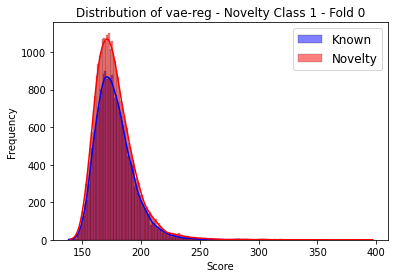

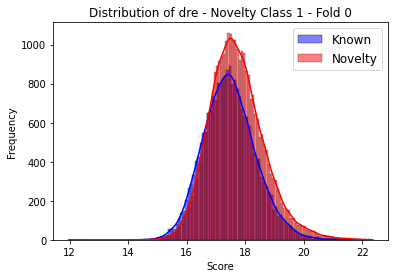

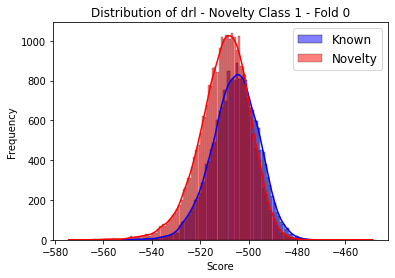

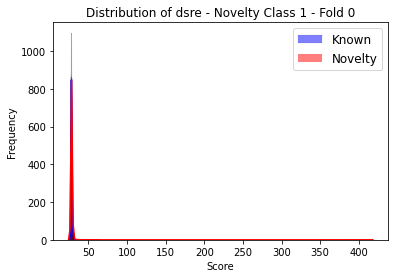

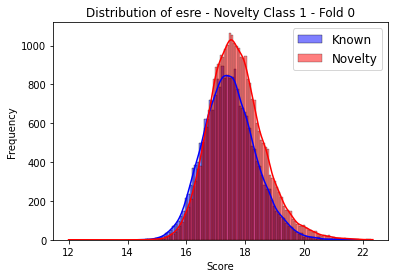

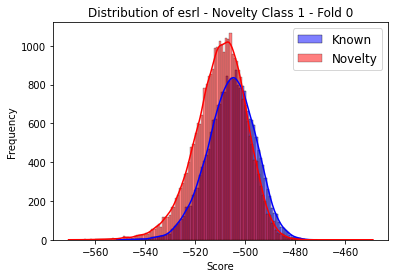

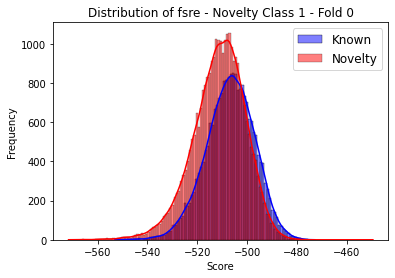

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_novelty_score_histogram(scores_known, scores_novelty, method):
    sns.histplot(scores_known[method],  kde=True, label='Known', color='blue')
    sns.histplot(scores_novelty[method],  kde=True, label='Novelty', color='red')

    # Plot formatting
    plt.legend(prop={'size': 12})
    plt.title(f'Distribution of {method} - Novelty Class {inovelty} - Fold {ifold}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

for method in scores_known.keys():
    get_novelty_score_histogram(scores['known'], scores['novelty'], method=method)

In [14]:
from scipy.io import savemat

def save_to_mat(data, path):
    # transform from logsigma to sigma
    data[:, :, 1] = np.exp(data[:, :, 1])
    savemat(path, data=data)
    

# Encode data
latent_normal_data = nd.encode(normal_data)
latent_test_data = nd.encode(test_data)

save_to_mat(latent_normal_data, "normal_data_path")
save_to_mat(latent_test_data, "test_data_path")

dict_keys(['vae-reg', 'dre', 'drl', 'dsre', 'esre', 'esrl', 'fsre'])

In [ ]:
# Rodar script no matlab e salvar os resultados no storage compartilhado

!test_data = load('test_data_path', 'data');
!normal_data = load('normal_data_path', 'data');
!novelty_score = compute_novelty_score(normal_data, test_data, 'metric', 'euclidean', 'use_gpu', true);